<a href="https://colab.research.google.com/github/jaden0305/proj_dbdt/blob/main/KAG_Conversion(%EA%B9%80%EA%B8%B0%ED%91%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA와 가설검정을 동시에 수행하였습니다.

1. EDA에 필요한 라이브러리를 불러오세요.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

2. 데이터 다운로드 후 코랩과 연결

In [100]:
# 구글 드라이브와 코랩을 연결
from google.colab import drive
drive.mount('/content/drive')

# KAG Conversion 파일을 탭 구분자로 읽기
conv = pd.read_csv('/content/drive/MyDrive/KAG_conversion_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. 첫 10개 데이터의 출력

In [4]:
conv.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


4. 데이터 수의 확인



In [5]:
# solution: shape함수를 통한 확인

#1-1. 데이터 프레임 정의: 행을 기준으로 Count
data_frame1 = conv.shape[0]

#1-2. 정의한 데이터 프레임 출력
print("conv 데이터의 수는",data_frame1,"개다.")

conv 데이터의 수는 1143 개다.


5. 데이터의 변수확인 - 결측치 데이터는 없음

In [6]:
# 데이터 변수(Column) 확인
print(conv.columns)

# 컬럼별 정보 확인
conv.info()

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory 

6. 현재 종류별로 몇개의 xyz 캠페인이 있는가? (1178 광고가 가장 많이 배포됨)

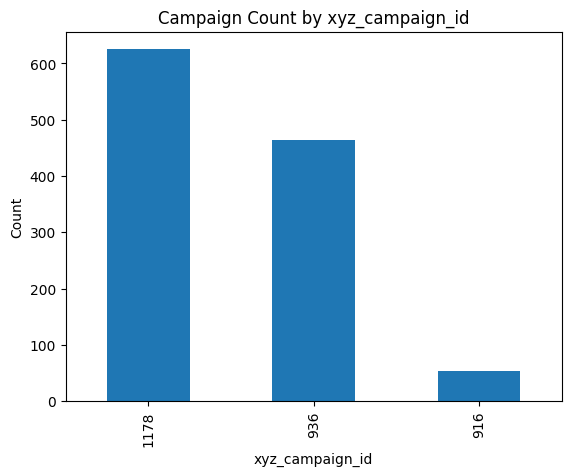

In [34]:
# 'xyz_campaign_id'별로 그룹화하고 각 그룹의 개수를 센다.
campaign_counts = conv['xyz_campaign_id'].value_counts()

# 시각화
campaign_counts.plot(kind='bar')
plt.xlabel('xyz_campaign_id')
plt.ylabel('Count')
plt.title('Campaign Count by xyz_campaign_id')
plt.show()

7. Age별 분포를 시각화

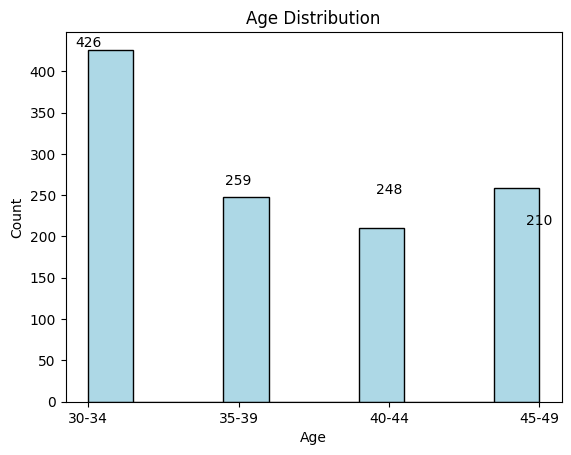

In [44]:
import matplotlib.pyplot as plt

# Age Distribution을 시각화
plt.hist(conv['age'], bins=10, color='lightblue', edgecolor='black')

# Count 값 표시
for age, count in zip(conv['age'].unique(), conv['age'].value_counts()):
    plt.text(age, count, str(count), ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

8. 성별 분포를 시각화

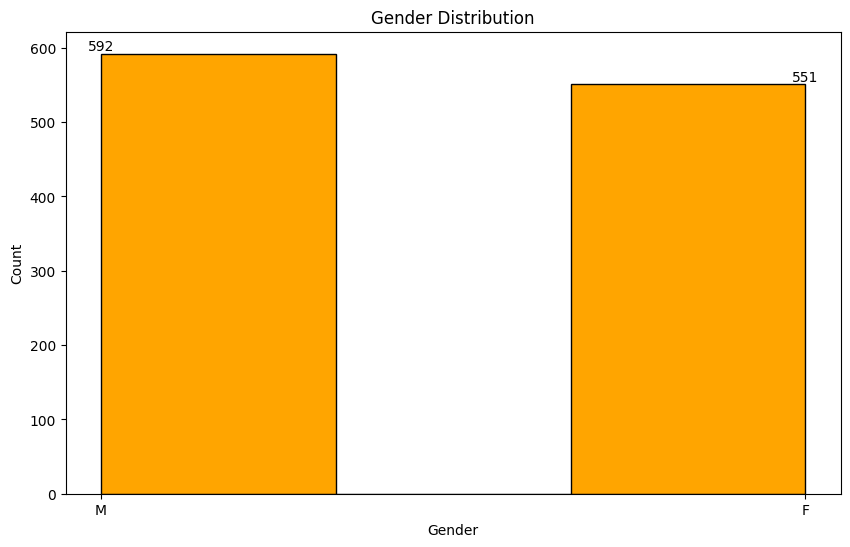

In [46]:
import matplotlib.pyplot as plt

# Gender Distribution을 시각화
plt.figure(figsize=(10, 6))
plt.hist(conv['gender'], bins=3, color='orange', edgecolor='black')

# Count 값 표시
for age, count in zip(conv['gender'].unique(), conv['gender'].value_counts()):
    plt.text(age, count, str(count), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


9. Age별 구매력을 분석

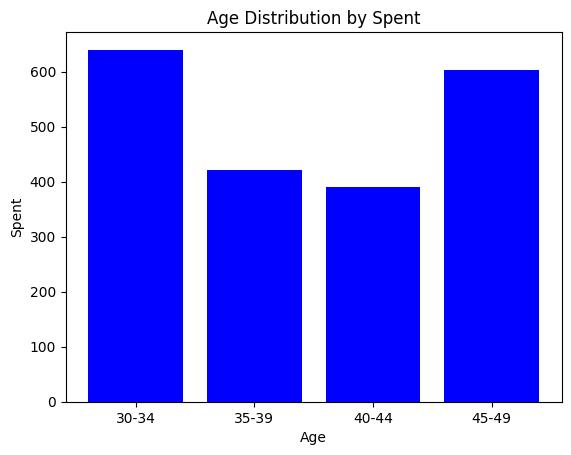

In [59]:
import matplotlib.pyplot as plt

# Age에 따라 데이터 정렬
conv_sorted = conv.sort_values('age')

# Age Distribution by Spent을 시각화
plt.bar(conv_sorted['age'], conv_sorted['Spent'], color='blue')

plt.xlabel('Age')
plt.ylabel('Spent')
plt.title('Age Distribution by Spent')
plt.show()


EDA는 마무리하고 가설을 분석

가설1: Impression > Clicks > Total Conversion > Approved Conversion의 Funnel이 있다. (O)

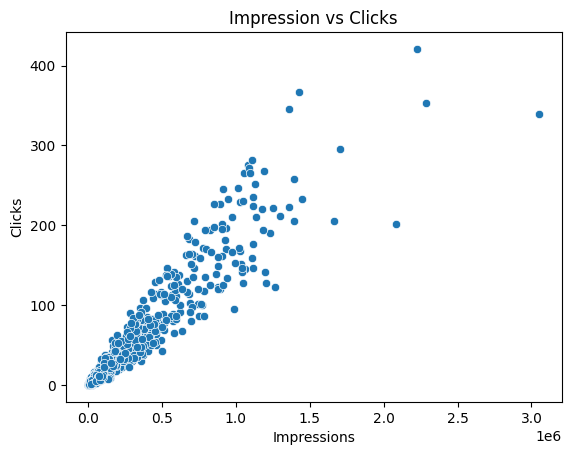

In [38]:
# Impression과 Clicks의 관계
sns.scatterplot(data=conv, x='Impressions', y='Clicks')
plt.title('Impression vs Clicks')
plt.show()

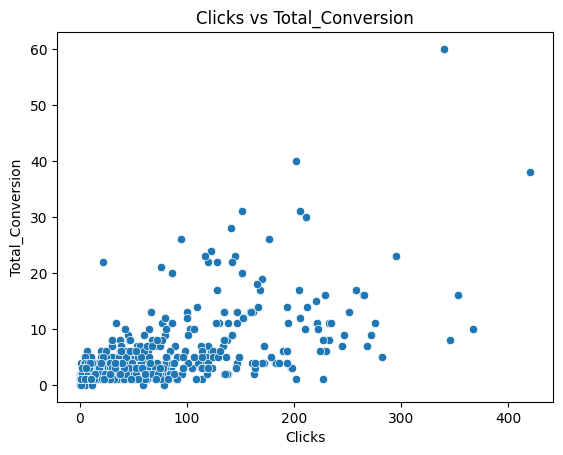

In [40]:
# Clicks와 Total_Conversion의 관계
sns.scatterplot(data=conv, x='Clicks', y='Total_Conversion')
plt.title('Clicks vs Total_Conversion')
plt.show()

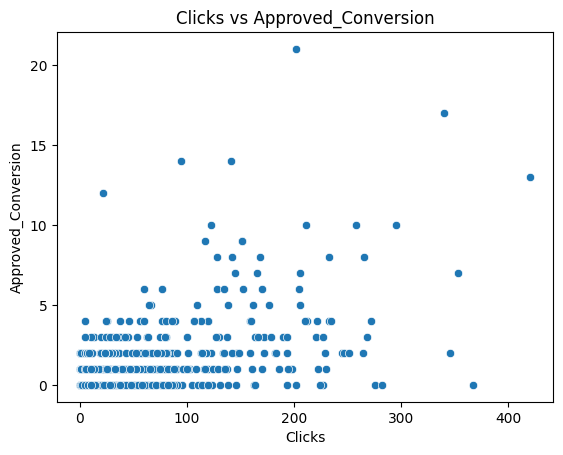

In [64]:
# Click와 Approved_Conversion의 관계
sns.scatterplot(data=conv, x='Clicks', y='Approved_Conversion')
plt.title('Clicks vs Approved_Conversion')
plt.show()

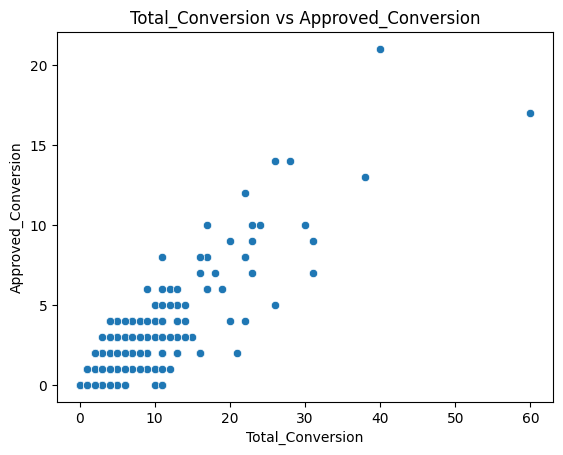

In [65]:
# Total_Converison와 Approved_Conversion의 관계
sns.scatterplot(data=conv, x='Total_Conversion', y='Approved_Conversion')
plt.title('Total_Conversion vs Approved_Conversion')
plt.show()

가설2: Clicks가 Total Conversion을 높이는 변수다. (O)

In [111]:
import pandas as pd
import statsmodels.api as sm

# 독립 변수로 'Clicks'와 종속 변수로 'Total Conversion' 설정
X = conv['Clicks']
y = conv['Total_Conversion']

# 상수항 (절편) 추가
X = sm.add_constant(X)

# 선형 회귀 모델 피팅
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Total_Conversion   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     1064.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          2.04e-165
Time:                        14:20:04   Log-Likelihood:                -2959.8
No. Observations:                1143   AIC:                             5924.
Df Residuals:                    1141   BIC:                             5934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0278      0.111      9.286      0.0

가설3: Clicks수가 Approved Conversion을 높이는 변수다 (O)

In [112]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = conv['Clicks']
y = conv['Approved_Conversion']

# 상수항 (Intercept) 추가
X = sm.add_constant(X)

# Linear Regression 모델 피팅
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Approved_Conversion   R-squared:                       0.313
Model:                             OLS   Adj. R-squared:                  0.312
Method:                  Least Squares   F-statistic:                     520.0
Date:                 Mon, 30 Oct 2023   Prob (F-statistic):           3.83e-95
Time:                         14:21:27   Log-Likelihood:                -2038.3
No. Observations:                 1143   AIC:                             4081.
Df Residuals:                     1141   BIC:                             4091.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3734      0.049      7.55

가설4: Click수가 가장 높은 Age군이 Approved Conversion을 높이는 Key Customer이다. (X)

* Age군이 범주형 자료이므로 만 휘트니 U 분석을 두 독립적인 그룹간의 관계를 효과적으로 분석함

In [117]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Clicks가 가장 높은 Age 그룹 선택
age_with_highest_clicks = conv.groupby('age')['Clicks'].mean().idxmax()

# Clicks가 가장 높은 Age 그룹과 다른 Age 그룹 간의 Approved_Conversion 비교
clicks_highest_group = conv[conv['age'] == age_with_highest_clicks]['Approved_Conversion']
clicks_other_groups = conv[conv['age'] != age_with_highest_clicks]['Approved_Conversion']

# 데이터가 있는지 확인
if len(clicks_highest_group) > 0 and len(clicks_other_groups) > 0:
    # Mann-Whitney U 검정 수행
    statistic, p = mannwhitneyu(clicks_highest_group, clicks_other_groups)

    # 결과 출력
    print(f"Age group with the highest Clicks: {age_with_highest_clicks}")
    print(f"Mann-Whitney U Statistic: {statistic}")
    print(f"P-value: {p}")

    # 결과 해석
    if p < 0.05:  # 일반적으로 사용하는 유의수준(0.05)을 기준으로 판단
        print("Clicks가 가장 높은 Age 그룹에서 Approved_Conversion이 다른 Age 그룹과 통계적으로 유의미하게 다름")
    else:
        print("Clicks가 가장 높은 Age 그룹에서 Approved_Conversion과 다른 Age 그룹 간에 통계적으로 유의미한 차이가 없음")
else:
    print("데이터가 없어서 Mann-Whitney U 검정을 수행할 수 없습니다.")


Age group with the highest Clicks: 45-49
Mann-Whitney U Statistic: 108001.5
P-value: 0.13013940479471572
Clicks가 가장 높은 Age 그룹에서 Approved_Conversion과 다른 Age 그룹 간에 통계적으로 유의미한 차이가 없음


가설5: Click수가 가장 높은 Gender군이 Approved Conversion을 높이는 Key Customer이다. (X)

Age군이 범주형 자료이므로 만 휘트니 U 분석을 두 독립적인 그룹간의 관계를 효과적으로 분석함

In [118]:
import pandas as pd
from scipy.stats import mannwhitneyu

# 데이터 로드 (conv 데이터 프레임을 사용)
# conv = pd.read_csv('your_data.csv')  # 데이터 파일 경로를 입력하세요

# Clicks가 가장 높은 Gender 그룹 선택
gender_with_highest_clicks = conv.groupby('gender')['Clicks'].mean().idxmax()

# Clicks가 가장 높은 Gender 그룹과 다른 Gender 그룹 간의 Approved_Conversion 비교
clicks_highest_group = conv[conv['gender'] == gender_with_highest_clicks]['Approved_Conversion']
clicks_other_groups = conv[conv['gender'] != gender_with_highest_clicks]['Approved_Conversion']

# 데이터가 있는지 확인
if len(clicks_highest_group) > 0 and len(clicks_other_groups) > 0:
    # Mann-Whitney U 검정 수행
    statistic, p = mannwhitneyu(clicks_highest_group, clicks_other_groups)

    # 결과 출력
    print(f"Gender group with the highest Clicks: {gender_with_highest_clicks}")
    print(f"Mann-Whitney U Statistic: {statistic}")
    print(f"P-value: {p}")

    # 결과 해석
    if p < 0.05:  # 일반적으로 사용하는 유의수준(0.05)을 기준으로 판단
        print("Clicks가 가장 높은 Gender 그룹에서 Approved_Conversion이 다른 Gender 그룹과 통계적으로 유의미하게 다름")
    else:
        print("Clicks가 가장 높은 Gender 그룹에서 Approved_Conversion과 다른 Gender 그룹 간에 통계적으로 유의미한 차이가 없음")
else:
    print("데이터가 없어서 Mann-Whitney U 검정을 수행할 수 없습니다.")


Gender group with the highest Clicks: F
Mann-Whitney U Statistic: 158280.0
P-value: 0.34572569049061874
Clicks가 가장 높은 Gender 그룹에서 Approved_Conversion과 다른 Gender 그룹 간에 통계적으로 유의미한 차이가 없음


가설6. Click수만이 아니라 Spent(구매력)이 높은 Age군이 Approved Conversion의 Key Driver이다. (O)

In [120]:
import pandas as pd
from scipy.stats import mannwhitneyu

# 데이터 로드 (conv 데이터 프레임을 사용)
# conv = pd.read_csv('your_data.csv')  # 데이터 파일 경로를 입력하세요

# 'Spent'가 가장 높은 'age' 그룹과 그 외 'age' 그룹으로 데이터 분리
age_group_with_highest_spent = conv.groupby('age')['Spent'].mean().idxmax()
spent_highest_group = conv[conv['age'] == age_group_with_highest_spent]
spent_other_groups = conv[conv['age'] != age_group_with_highest_spent]

# Mann-Whitney U 검정 수행
statistic, p = mannwhitneyu(spent_highest_group['Clicks'], spent_other_groups['Clicks'])

# 결과 출력
print(f"Age group with the highest Spent: {age_group_with_highest_spent}")
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p}")

# 결과 해석
if p < 0.05:  # 일반적으로 사용하는 유의수준(0.05)을 기준으로 판단
    print("Spent가 가장 높은 Age 그룹에서 Clicks와 Approved_Conversion 간에 통계적으로 유의미한 차이가 있음")
else:
    print("Spent가 가장 높은 Age 그룹에서 Clicks와 Approved_Conversion 간에 통계적으로 유의미한 차이가 없음")


Age group with the highest Spent: 45-49
Mann-Whitney U Statistic: 144669.0
P-value: 8.790426257201246e-11
Spent가 가장 높은 Age 그룹에서 Clicks와 Approved_Conversion 간에 통계적으로 유의미한 차이가 있음


결론: 단순히 Click수가 높은 30-34세보다는 높은 구매력(Spent)를 바탕으로 Approved_Conversion을 발생시키는 45-49세를 공략하는 프리미엄 마케팅을 수행해야한다.